# Visualisations for Thesis

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create uniform colour palette
palette ={"NEU": "#b2b2b2", "NEG": "#ff8f8f", "POS": "#00FF00"}
# set uniform figure size
sns.set(rc={'figure.figsize':(10,6.5)})
# set seaborne style
sns.set_style('whitegrid')

In [115]:
# load data
df = pd.read_csv("dataset_token_ready.csv")
df['month'] = pd.DatetimeIndex(df['date']).month

with open("dataset_sentiment.pkl", "rb") as f:
    dfa = pickle.load(f)
    
# drop Radio 800
dfa = dfa.loc[dfa["page"] != "Radio 800"]

# keep only data from 2017
dfa = dfa.loc[dfa["year"] > 2016]

# transform date to datetime format
dfa['date'] = pd.to_datetime(dfa['date'], errors='coerce')
    
    



In [116]:
repl_dict = {
    "Canal10":"Canal10",
     'Canal4':"regime",
     'Radio la Primerisima':"regime",
     'Confidencial':"opposition",
     'Canal6':"regime",
     'Canal14':"Canal14",
     '100% Noticias':"opposition",
     'Canal13':"regime",
     'Canal2':"regime",
     'Radio Nicaragua':"regime",
     'Radio Corporacion':"Radio Corporacion"
}

# create categories
dfa["position"] = dfa["page"].replace(repl_dict)
df["position"] = df["page"].replace(repl_dict)

## Sentiment Visualisations

<AxesSubplot:xlabel='year', ylabel='proportion'>

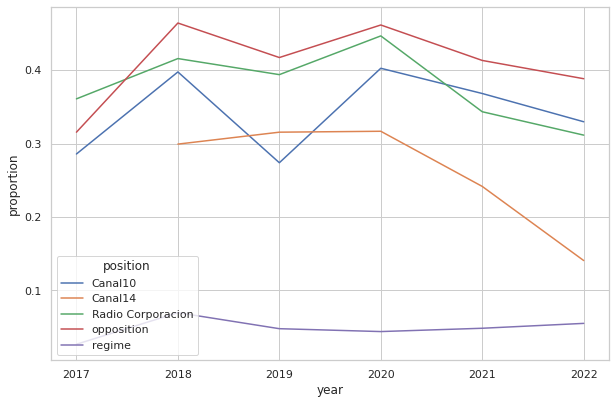

In [117]:
# create aggregated overview of sentiment per position and year
df_agg = (dfa.groupby(["position", "year"])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

# all positions, but only negative with R corporacion as neutral
(df_agg
 .loc[(df_agg["sentiment"]=="NEG")]
 .pipe((sns.lineplot, "data"),
       x="year", y="proportion",
       hue="position"))

<AxesSubplot:xlabel='date', ylabel='proportion'>

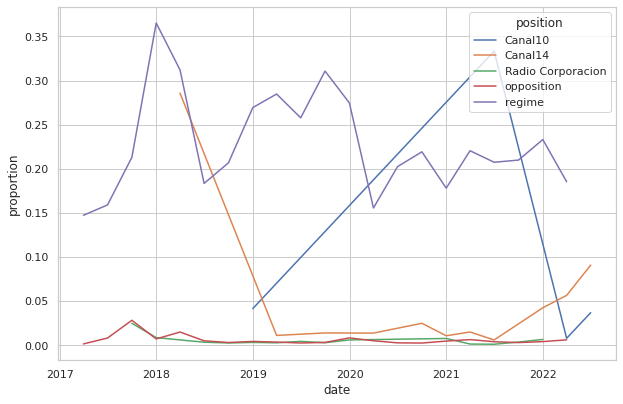

In [124]:
# create aggregated overview of sentiment per position and year-quarter
df_agg = (dfa.groupby(["position",pd.Grouper(key='date', freq='Q')])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

# all positions, but only negative with R corporacion as neutral
(df_agg
 .loc[(df_agg["sentiment"]=="POS")]
 .pipe((sns.lineplot, "data"),
       x="date", y="proportion",
       hue="position"))

## Yearly Polarity and Independence Visualisation

<AxesSubplot:xlabel='year', ylabel='polarity'>

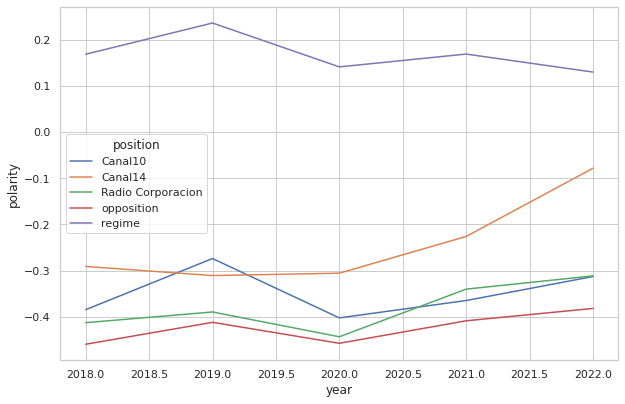

In [185]:
# create yearly polarity scores 

# create aggregated overview of sentiment per position and year-quarter
df_agg = (dfa.groupby(["position", "year"])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

df_agg.loc[df_agg["sentiment"] == "NEU", "polarity"] = 0
df_agg.loc[df_agg["sentiment"] == "POS", "polarity"] = df_agg["proportion"]
df_agg.loc[df_agg["sentiment"] == "NEG", "polarity"] = df_agg["proportion"]*(-1)

df_pol = df_agg.groupby(["position", "year"]).agg({"polarity":np.sum}).reset_index()

(df_pol.loc[df_pol["year"] > 2017]
 .pipe((sns.lineplot, "data"),
       x="year", y="polarity",
       hue="position"))

<AxesSubplot:xlabel='year', ylabel='independence score'>

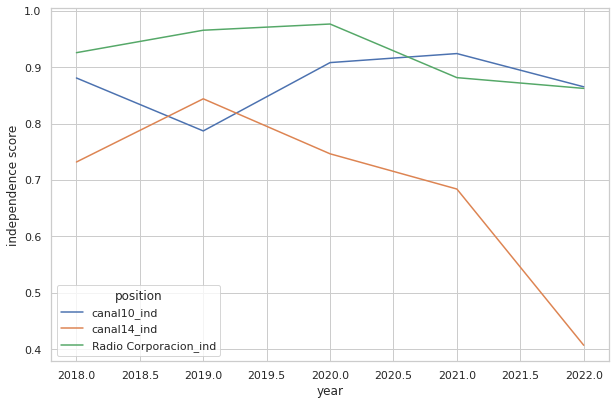

In [182]:
# create quarterly independence score visualisations

# create table to see how many mentions per outlet per year
df_can = pd.pivot(df_pol.loc[df_pol["year"] > 2017], index = "year", columns = "position", values = "polarity")

df_can["canal10_ind"] = (df_can["Canal10"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])
df_can["canal14_ind"] = (df_can["Canal14"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])
df_can["Radio Corporacion_ind"] = (df_can["Radio Corporacion"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])

# melt back to long format
df_ind = pd.melt(df_can.reset_index(), id_vars=['year'],
        value_vars=['canal10_ind', "canal14_ind", "Radio Corporacion_ind"],
       value_name = "independence score")

(df_ind
 .pipe((sns.lineplot, "data"),
       x="year", y="independence score",
       hue="position"))

## Quarterly Polarity and Independence Visualisation

<AxesSubplot:xlabel='date', ylabel='polarity'>

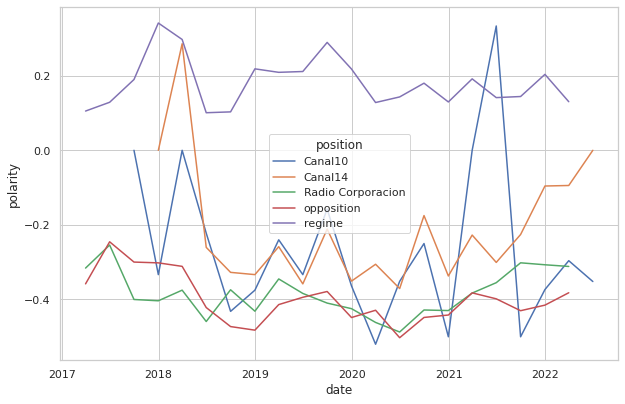

In [172]:
# create quarterly polarity scores 

# create aggregated overview of sentiment per position and year-quarter
df_agg = (dfa.groupby(["position",pd.Grouper(key='date', freq='Q')])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

df_agg.loc[df_agg["sentiment"] == "NEU", "polarity"] = 0
df_agg.loc[df_agg["sentiment"] == "POS", "polarity"] = df_agg["proportion"]
df_agg.loc[df_agg["sentiment"] == "NEG", "polarity"] = df_agg["proportion"]*(-1)

df_pol = df_agg.groupby(["position", "date"]).agg({"polarity":np.sum}).reset_index()

(df_pol
 .pipe((sns.lineplot, "data"),
       x="date", y="polarity",
       hue="position"))

<AxesSubplot:xlabel='date', ylabel='independence score'>

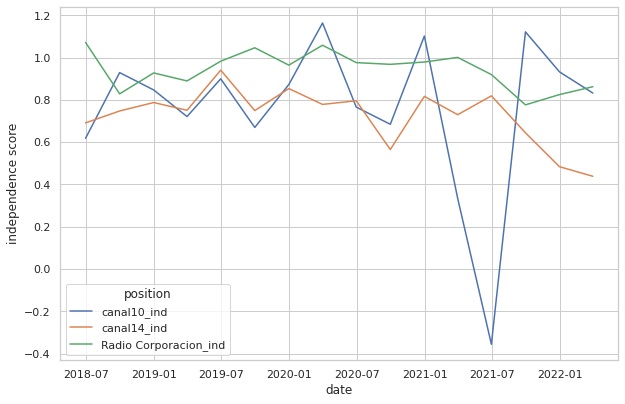

In [173]:
# create quarterly independence score visualisations

# create table to see how many mentions per outlet per year
df_can = pd.pivot(df_pol.loc[df_pol["date"] > '2018-03-31'], index = "date", columns = "position", values = "polarity")

df_can["canal10_ind"] = (df_can["Canal10"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])
df_can["canal14_ind"] = (df_can["Canal14"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])
df_can["Radio Corporacion_ind"] = (df_can["Radio Corporacion"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])

# melt back to long format
df_ind = pd.melt(df_can.reset_index(), id_vars=['date'],
        value_vars=['canal10_ind', "canal14_ind", "Radio Corporacion_ind"],
       value_name = "independence score")

(df_ind
 .pipe((sns.lineplot, "data"),
       x="date", y="independence score",
       hue="position"))